In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import random
import os

In [10]:
print(os.listdir('/content/drive/MyDrive/Project( Dog and Cat)/training_set'))

['dog.552.jpg', 'dog.555.jpg', 'dog.355.jpg', 'dog.3502.jpg', 'dog.3846.jpg', 'dog.3929.jpg', 'dog.3609.jpg', 'dog.3658.jpg', 'dog.3518.jpg', 'dog.3841.jpg', 'dog.3801.jpg', 'dog.415.jpg', 'dog.3358.jpg', 'dog.3432.jpg', 'dog.3747.jpg', 'dog.590.jpg', 'dog.3383.jpg', 'dog.334.jpg', 'dog.3569.jpg', 'dog.388.jpg', 'dog.3969.jpg', 'dog.479.jpg', 'dog.341.jpg', 'dog.410.jpg', 'dog.3788.jpg', 'dog.3535.jpg', 'dog.3473.jpg', 'dog.360.jpg', 'dog.3489.jpg', 'dog.3904.jpg', 'dog.3901.jpg', 'dog.517.jpg', 'dog.3452.jpg', 'dog.3557.jpg', 'dog.3589.jpg', 'dog.3765.jpg', 'dog.3522.jpg', 'dog.3562.jpg', 'dog.3784.jpg', 'dog.3591.jpg', 'dog.3550.jpg', 'dog.3910.jpg', 'dog.3809.jpg', 'dog.478.jpg', 'dog.464.jpg', 'dog.3905.jpg', 'dog.3738.jpg', 'dog.3585.jpg', 'dog.3988.jpg', 'dog.3501.jpg', 'dog.3346.jpg', 'dog.565.jpg', 'dog.3717.jpg', 'dog.3771.jpg', 'dog.3704.jpg', 'dog.3541.jpg', 'dog.3769.jpg', 'dog.3598.jpg', 'dog.3775.jpg', 'dog.577.jpg', 'dog.547.jpg', 'dog.3433.jpg', 'dog.3586.jpg', 'dog.342

##Define Constants

In [11]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Project( Dog and Cat)/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5.zip',"r") as z:
    z.extractall(".")

In [12]:
FAST_RUN = False
IMAGE_WIDTH = 128       # chiều rộng
IMAGE_HEIGHT = 128      # chiều cao
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3      # chiều sâu(số lớp)
RESNET_WEIGHTS_PATH = '/content/drive/MyDrive/Project( Dog and Cat)/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

##Prepare Training Data

In [13]:
filenames_train = os.listdir('/content/drive/MyDrive/Project( Dog and Cat)/training_set')

In [14]:
len(filenames_train)

8023

In [15]:
categories = []
for filename in filenames_train:
  category = filename.split('.')[0]
  if category == 'dog':
    categories.append(1)
  else :
    categories.append(0)

df = pd.DataFrame({
    'filename': filenames_train,
    'category': categories
})

In [16]:
df.head()

,filename,category
0,dog.552.jpg,1
1,dog.555.jpg,1
2,dog.355.jpg,1
3,dog.3502.jpg,1
4,dog.3846.jpg,1


In [17]:
df.tail()

,filename,category
8018,cat.1074.jpg,0
8019,cat.1062.jpg,0
8020,cat.1045.jpg,0
8021,cat.101.jpg,0
8022,cat.1070.jpg,0


<Axes: xlabel='category'>

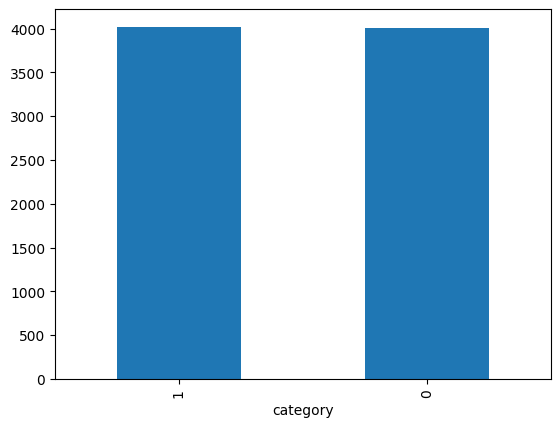

In [18]:
df['category'].value_counts().plot.bar()


##See sample image

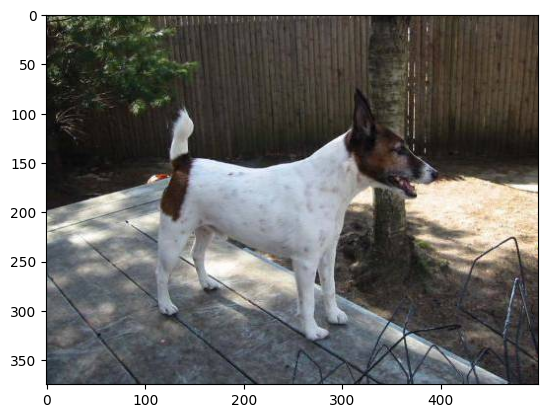

In [19]:
sample = random.choice(filenames_train)
image = load_img('/content/drive/MyDrive/Project( Dog and Cat)/training_set/' + sample)
plt.imshow(image)

##BUILD MODEL

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras import regularizers
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input

In [21]:
# model = Sequential()

# model.add(Conv2D(32, kernel_size = (3,3) , input_shape = (IMAGE_WIDTH , IMAGE_HEIGHT , IMAGE_CHANNELS), activation = 'relu', padding = 'same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, kernel_size = (3,3) , activation = 'relu', padding = 'same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, kernel_size = (3,3) , activation = 'relu', padding = 'same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(256, kernel_size = (3,3) , activation = 'relu', padding = 'same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(512, kernel_size = (3,3) , activation = 'relu', padding = 'same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(1, activation = 'sigmoid'))

# model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
# model.summary()
model = Sequential()

model.add(ResNet50(include_top=False, pooling='avg', weights=RESNET_WEIGHTS_PATH))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].trainable = False

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

ValueError: Shape mismatch in layer #26 (named conv3_block1_0_conv)for weight conv3_block1_0_conv/kernel. Weight expects shape (1, 1, 256, 512). Received saved weight with shape (1, 1, 128, 512)

##Callbacks

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
earlystop = EarlyStopping(patience = 10)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',
                                            patience = 2,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.00001)

In [ ]:
callbacks = [earlystop , learning_rate_reduction]

##Prepare data

In [ ]:
df['category'] = df['category'].replace({0: 'cat', 1: 'dog'})
df

In [ ]:
train_df, validate_df = train_test_split(df, test_size = 0.20, random_state = 42)
train_df.reset_index(inplace = True)
validate_df.reset_index(inplace = True)

In [ ]:
train_df['category'].value_counts().plot.bar()

In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size = 15

##Training Generator

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    rescale = 1./255,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

train_geneartor = train_datagen.flow_from_dataframe(
    train_df,
    '/content/drive/MyDrive/Project( Dog and Cat)/training_set',
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    class_mode = 'binary'
)

In [ ]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    '/content/drive/MyDrive/Project( Dog and Cat)/training_set',
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    class_mode = 'binary'
)

In [ ]:
train_geneartor

##See how our generator work

In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    '/content/drive/MyDrive/Project( Dog and Cat)/training_set',
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='raw'
)


In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

###Fit Model

In [ ]:
epoches = 3 if FAST_RUN else 50
history = model.fit(
    train_geneartor,
    epochs = epoches,
    validation_data = validation_generator,
    validation_steps = total_validate//batch_size,
    steps_per_epoch = total_train//batch_size,
    callbacks = callbacks
)

In [ ]:
model.save_weights("model.weights.h5")

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epoches, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.legend(loc='best', shadow = True)

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epoches, 1))
ax2.legend(loc='best', shadow=True)

plt.tight_layout()
plt.show()